In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [18]:
data=pd.read_csv("train.csv",sep=";")

In [19]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [21]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [35]:
x=list(data.columns)
if 'y' in x:
  x.remove('y')
print(x)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'martial']


In [36]:
y=data.y.map(lambda x:int(x=='yes'))

In [37]:
x

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'martial']

In [38]:
data.drop(['contact','day','month','poutcome','pdays'],axis=1)


,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,y,martial
0,58,4,married,2,0,2143,1,no,261,1,0,0,1
1,44,9,single,1,0,29,1,no,151,1,0,0,2
2,33,2,married,1,0,2,1,yes,76,1,0,0,1
3,47,1,married,3,0,1506,1,no,92,1,0,0,1
4,33,11,single,3,0,1,0,no,198,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,married,2,0,825,0,no,977,3,0,1,1
45207,71,5,divorced,0,0,1729,0,no,456,2,0,1,0
45208,72,5,married,1,0,5715,0,no,1127,5,3,1,1
45209,57,1,married,1,0,668,0,no,508,4,0,0,1


In [39]:
data['housing'].unique()

array([1, 0])

In [52]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['job']=labelencoder.fit_transform(data['job'])
data['marital']=labelencoder.fit_transform(data['marital'])
data['education']=labelencoder.fit_transform(data['education'])
data['default']=labelencoder.fit_transform(data['default'])
data['housing']=labelencoder.fit_transform(data['housing'])
data['loan']=labelencoder.fit_transform(data['loan'])
data['contact']=labelencoder.fit_transform(data['contact']) # Applying Label Encoding to the 'contact' column
data['month']=labelencoder.fit_transform(data['month']) # Applying Label Encoding to the 'month' column
data['poutcome']=labelencoder.fit_transform(data['poutcome'])



data['y']=labelencoder.fit_transform(data['y'])

In [53]:
x=data.drop('y',axis=1)

In [54]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=40)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(train_x,train_y)

KNeighborsClassifier()

In [56]:
pred_y=knn_clf.predict(test_x)

In [57]:
pred_y

array([0, 0, 0, ..., 0, 0, 0])

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


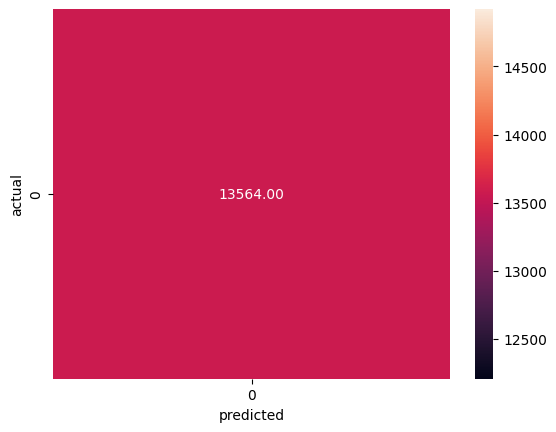

In [58]:
def draw_cm(actual,predicted):
  cm=metrics.confusion_matrix(actual,predicted)
  sn.heatmap(cm,annot=True,fmt='.2f')
  xticklabels=['predicted_no','prdicted_yes']
  yticklabels=['actual_no','actual_yes']
  plt.ylabel('actual')
  plt.xlabel('predicted')
  plt.show()
draw_cm(test_y,pred_y)